In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [158]:
def identify_pareto(scores):
    # Count number of items
    population_size = scores.shape[0]
    # Create a NumPy index for scores on the pareto front (zero indexed)
    population_ids = np.arange(population_size)
    # Create a starting list of items on the Pareto front
    # All items start off as being labelled as on the Parteo front
    pareto_front = np.ones(population_size, dtype=bool)
    # Loop through each item. This will then be compared with all other items
    for i in range(population_size):
        # Loop through all other items
        for j in range(population_size):
            # Check if our 'i' pint is dominated by out 'j' point
            if (scores[j][0] <= scores[i][0]) and (scores[j][1] >= scores[i][1]) and ((scores[j][0] < scores[i][0]) or (scores[j][1] > scores[i][1])):
                # j dominates i. Label 'i' point as not on Pareto front
                pareto_front[i] = 0
                # Stop further comparisons with 'i' (no more comparisons needed)
                break
    # Return ids of scenarios on pareto front
    return population_ids[pareto_front]

In [159]:
hp_result_p = pd.read_csv('result_exp_1_P.csv', index_col=0)
hp_result_u = pd.read_csv('result_exp_1_U.csv', index_col=0)

In [160]:
hp_result_p.columns

Index(['alpha_u', 'alpha_i', 'alpha_b', 'dim', 'lr', 'sigma', 'valid_error',
       'valid_mpr', 'valid_hit_rate', 'epoch', 'valid_correct_count'],
      dtype='object')

### Popularity Sampling:

In [219]:
print('Popularity Sampling')
print('-'*50)
print('Best HP Sets for highest valid_correct_count:')
display(hp_result_p.nlargest(5, 'valid_correct_count'))
print('Best HP Sets for lowest MPR:')
display(hp_result_p.nsmallest(5, 'valid_mpr'))

Popularity Sampling
--------------------------------------------------
Best HP Sets for highest valid_correct_count:


,alpha_u,alpha_i,alpha_b,dim,lr,sigma,valid_error,valid_mpr,valid_hit_rate,epoch,valid_correct_count
53,0.010,0.010,0.10,60,0.029525,0.1000,-1953.813488,0.117995,[0.00711921 0.0647351 0.23592715 0.86953642],26,5283
12,0.010,0.001,0.10,150,0.072900,0.1000,-2267.522648,0.151893,[0.00612583 0.04735099 0.20049669 0.81870861],12,5170
66,0.001,0.010,0.05,45,0.065610,0.0010,-2101.308869,0.135251,[0.00678808 0.06142384 0.20182119 0.84288079],20,5164
7,0.050,0.001,0.10,35,0.003487,0.0100,-2206.855880,0.126572,[0.00827815 0.07781457 0.26274834 0.86572848],50,5157
85,0.050,0.010,0.05,30,0.023915,0.0001,-2366.160918,0.125575,[0.00827815 0.07135762 0.23294702 0.85844371],33,5127


Best HP Sets for lowest MPR:


,alpha_u,alpha_i,alpha_b,dim,lr,sigma,valid_error,valid_mpr,valid_hit_rate,epoch,valid_correct_count
24,0.001,0.05,0.001,150,0.003487,0.10,-2489.749592,0.107787,[0.00860927 0.06937086 0.25215232 0.88509934],50,4919
76,0.001,0.01,0.001,40,0.003487,0.01,-2104.463052,0.112522,[0.00844371 0.07615894 0.25927152 0.87963576],50,4990
61,0.010,0.01,0.010,45,0.029525,0.10,-1964.208897,0.115520,[0.00827815 0.06986755 0.24569536 0.87384106],23,5115
34,0.001,0.01,0.010,40,0.003487,0.10,-2038.886864,0.116244,[0.00860927 0.07731788 0.25728477 0.87152318],50,5058
74,0.010,0.01,0.010,30,0.003487,0.10,-2108.581111,0.116596,[0.00827815 0.07798013 0.25678808 0.87251656],50,5064


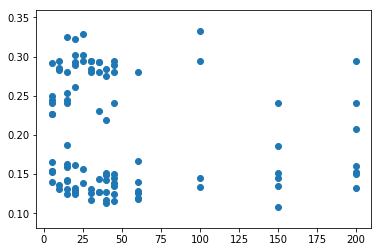

In [220]:
plt.scatter(hp_result_p['dim'], hp_result_p['valid_mpr'])

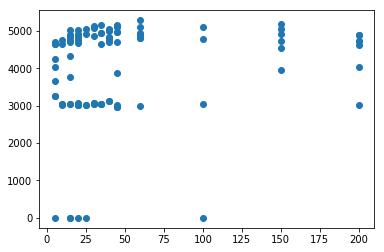

In [221]:
plt.scatter(hp_result_p['dim'], hp_result_p['valid_correct_count'])

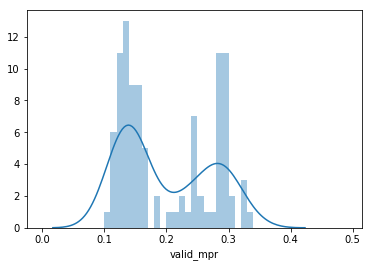

In [222]:
sns.distplot(hp_result_p['valid_mpr'], bins=np.arange(0,0.5,0.01))

In [223]:
print('First Option HP Set:')
display(hp_result_p.iloc[53])

First Option HP Set:


alpha_u                                                         0.01
alpha_i                                                         0.01
alpha_b                                                          0.1
dim                                                               60
lr                                                         0.0295245
sigma                                                            0.1
valid_error                                                 -1953.81
valid_mpr                                                   0.117995
valid_hit_rate         [0.00711921 0.0647351  0.23592715 0.86953642]
epoch                                                             26
valid_correct_count                                             5283
Name: 53, dtype: object

In [224]:
mask = hp_result_p['valid_mpr'] < hp_result_p.iloc[53]['valid_mpr']
mask.sum()

5

In [225]:
hp_result_p[mask]

,alpha_u,alpha_i,alpha_b,dim,lr,sigma,valid_error,valid_mpr,valid_hit_rate,epoch,valid_correct_count
24,0.001,0.05,0.001,150,0.003487,0.10,-2489.749592,0.107787,[0.00860927 0.06937086 0.25215232 0.88509934],50,4919
34,0.001,0.01,0.010,40,0.003487,0.10,-2038.886864,0.116244,[0.00860927 0.07731788 0.25728477 0.87152318],50,5058
61,0.010,0.01,0.010,45,0.029525,0.10,-1964.208897,0.115520,[0.00827815 0.06986755 0.24569536 0.87384106],23,5115
74,0.010,0.01,0.010,30,0.003487,0.10,-2108.581111,0.116596,[0.00827815 0.07798013 0.25678808 0.87251656],50,5064
76,0.001,0.01,0.001,40,0.003487,0.01,-2104.463052,0.112522,[0.00844371 0.07615894 0.25927152 0.87963576],50,4990


In [226]:
print('Second Option HP Set:')
display(hp_result_p.iloc[61])

Second Option HP Set:


alpha_u                                                         0.01
alpha_i                                                         0.01
alpha_b                                                         0.01
dim                                                               45
lr                                                         0.0295245
sigma                                                            0.1
valid_error                                                 -1964.21
valid_mpr                                                    0.11552
valid_hit_rate         [0.00827815 0.06986755 0.24569536 0.87384106]
epoch                                                             23
valid_correct_count                                             5115
Name: 61, dtype: object

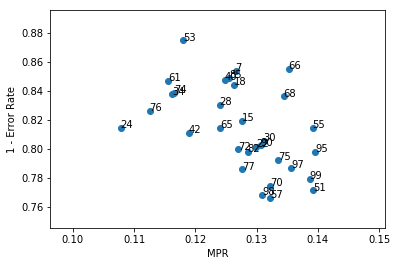

In [227]:
mask_2 = hp_result_p['valid_mpr'] < 0.14

fig, ax = plt.subplots()
ax.scatter(hp_result_p['valid_mpr'][mask_2], hp_result_p['valid_correct_count'][mask_2]/6040)

for index, row in hp_result_p.loc[mask_2].iterrows():
    ax.annotate(str(index), (row['valid_mpr'], row['valid_correct_count']/6040))
    
plt.xlabel('MPR')
plt.ylabel('1 - Error Rate')
plt.show()

In [228]:
scores = hp_result_p[['valid_mpr', 'valid_correct_count']].values
pareto = identify_pareto(scores)
print('Pareto front index vales')
print('Points on Pareto front: \n',pareto)

pareto_front = scores[pareto]
print ('\nPareto front scores')
print (pareto_front)

Pareto front index vales
Points on Pareto front: 
 [24 53 61 76]

Pareto front scores
[[1.07786507e-01 4.91900000e+03]
 [1.17994566e-01 5.28300000e+03]
 [1.15519747e-01 5.11500000e+03]
 [1.12522276e-01 4.99000000e+03]]


In [229]:
pareto_front_df = pd.DataFrame(pareto_front)
pareto_front_df.sort_values(0, inplace=True)
pareto_front = pareto_front_df.values

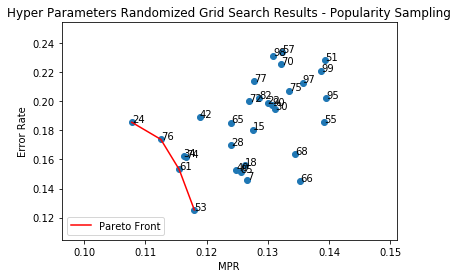

In [230]:
def make_error_rate(number):
    return (6040-number)/6040
x_all = scores[:, 0][mask_2]
y_all = make_error_rate(scores[:, 1][mask_2])
x_pareto = pareto_front[:, 0]
y_pareto = make_error_rate(pareto_front[:, 1])

fig, ax = plt.subplots()
ax.scatter(x_all, y_all)
ax.plot(x_pareto, y_pareto, color='r', label='Pareto Front')

for index, row in hp_result_p.loc[mask_2].iterrows():
    ax.annotate(str(index), (row['valid_mpr'], make_error_rate(row['valid_correct_count'])))
    
plt.xlabel('MPR')
plt.ylabel('Error Rate')
plt.legend(loc=3)
plt.title('Hyper Parameters Randomized Grid Search Results - Popularity Sampling')
plt.show()

In [173]:
hp_result_p.iloc[[24,76,61,53]]

,alpha_u,alpha_i,alpha_b,dim,lr,sigma,valid_error,valid_mpr,valid_hit_rate,epoch,valid_correct_count
24,0.001,0.05,0.001,150,0.003487,0.10,-2489.749592,0.107787,[0.00860927 0.06937086 0.25215232 0.88509934],50,4919
76,0.001,0.01,0.001,40,0.003487,0.01,-2104.463052,0.112522,[0.00844371 0.07615894 0.25927152 0.87963576],50,4990
61,0.010,0.01,0.010,45,0.029525,0.10,-1964.208897,0.115520,[0.00827815 0.06986755 0.24569536 0.87384106],23,5115
53,0.010,0.01,0.100,60,0.029525,0.10,-1953.813488,0.117995,[0.00711921 0.0647351 0.23592715 0.86953642],26,5283


### Uniform Sampling:

In [208]:
print('Uniform Sampling')
print('-'*50)
print('Best HP Sets for highest valid_correct_count:')
display(hp_result_u.nlargest(5, 'valid_correct_count'))
print('Best HP Sets for lowest MPR:')
display(hp_result_u.nsmallest(5, 'valid_mpr'))

Uniform Sampling
--------------------------------------------------
Best HP Sets for highest valid_correct_count:


,alpha_u,alpha_i,alpha_b,dim,lr,sigma,valid_error,valid_mpr,valid_hit_rate,epoch,valid_correct_count
53,0.010,0.010,0.10,60,0.026572,0.1000,-1129.093867,0.082410,[0.00794702 0.07400662 0.26986755 0.92831126],29,5668
12,0.010,0.001,0.10,150,0.065610,0.1000,-1058.494071,0.088492,[0.0057947 0.07036424 0.25645695 0.9192053 ],20,5652
47,0.001,0.001,0.05,100,0.065610,0.0001,-1055.573839,0.087955,[0.00844371 0.0705298 0.25844371 0.92086093],21,5631
60,0.050,0.001,0.05,25,0.029525,0.1000,-1253.318979,0.087641,[0.00778146 0.07566225 0.26705298 0.9192053 ],25,5631
92,0.050,0.001,0.05,60,0.023915,0.0001,-1283.433239,0.090745,[0.00943709 0.07566225 0.25877483 0.91208609],35,5617


Best HP Sets for lowest MPR:


,alpha_u,alpha_i,alpha_b,dim,lr,sigma,valid_error,valid_mpr,valid_hit_rate,epoch,valid_correct_count
53,0.010,0.010,0.100,60,0.026572,0.1000,-1129.093867,0.082410,[0.00794702 0.07400662 0.26986755 0.92831126],29,5668
18,0.010,0.001,0.001,60,0.023915,0.0010,-1025.899763,0.082701,[0.0089404 0.07930464 0.27450331 0.92748344],35,4919
61,0.010,0.010,0.010,45,0.029525,0.1000,-1169.360294,0.082801,[0.00827815 0.07566225 0.27301325 0.92781457],25,5364
60,0.050,0.001,0.050,25,0.029525,0.1000,-1253.318979,0.087641,[0.00778146 0.07566225 0.26705298 0.9192053 ],25,5631
47,0.001,0.001,0.050,100,0.065610,0.0001,-1055.573839,0.087955,[0.00844371 0.0705298 0.25844371 0.92086093],21,5631


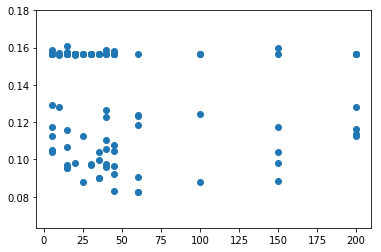

In [209]:
plt.scatter(hp_result_u['dim'], hp_result_u['valid_mpr'])

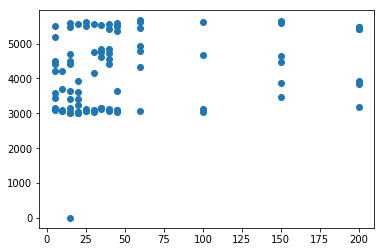

In [210]:
plt.scatter(hp_result_u['dim'], hp_result_u['valid_correct_count'])

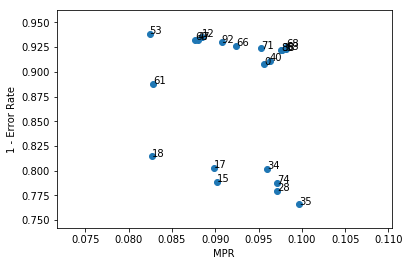

In [211]:
mask_3 = hp_result_u['valid_mpr'] < 0.1

fig, ax = plt.subplots()
ax.scatter(hp_result_u['valid_mpr'][mask_3], hp_result_u['valid_correct_count'][mask_3]/6040)

for index, row in hp_result_u.loc[mask_3].iterrows():
    ax.annotate(str(index), (row['valid_mpr'], row['valid_correct_count']/6040))
    
plt.xlabel('MPR')
plt.ylabel('1 - Error Rate')
plt.show()

In [212]:
scores = hp_result_u[['valid_mpr', 'valid_correct_count']].values
pareto = identify_pareto(scores)
print('Pareto front index vales')
print('Points on Pareto front: \n',pareto)

pareto_front = scores[pareto]
print ('\nPareto front scores')
print (pareto_front)

Pareto front index vales
Points on Pareto front: 
 [53]

Pareto front scores
[[8.2410024e-02 5.6680000e+03]]


In [213]:
pareto_front_df = pd.DataFrame(pareto_front)
pareto_front_df.sort_values(0, inplace=True)
pareto_front = pareto_front_df.values

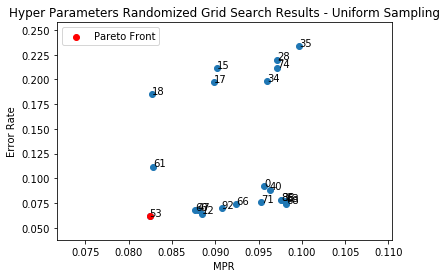

In [218]:
x_all = scores[:, 0][mask_3]
y_all = make_error_rate(scores[:, 1][mask_3])
x_pareto = pareto_front[:, 0]
y_pareto = make_error_rate(pareto_front[:, 1])

fig, ax = plt.subplots()
ax.scatter(x_all, y_all)
ax.scatter(x_pareto, y_pareto, color='r', label='Pareto Front')

for index, row in hp_result_u.loc[mask_3].iterrows():
    ax.annotate(str(index), (row['valid_mpr'], make_error_rate(row['valid_correct_count'])))
    
plt.xlabel('MPR')
plt.ylabel('Error Rate')
plt.legend(loc=2)
plt.title('Hyper Parameters Randomized Grid Search Results - Uniform Sampling')
plt.show()

In [181]:
print('First Option HP Set:')
display(hp_result_u.iloc[53])

First Option HP Set:


alpha_u                                                         0.01
alpha_i                                                         0.01
alpha_b                                                          0.1
dim                                                               60
lr                                                         0.0265721
sigma                                                            0.1
valid_error                                                 -1129.09
valid_mpr                                                    0.08241
valid_hit_rate         [0.00794702 0.07400662 0.26986755 0.92831126]
epoch                                                             29
valid_correct_count                                             5668
Name: 53, dtype: object

In [182]:
display(hp_result_p.iloc[53])

alpha_u                                                         0.01
alpha_i                                                         0.01
alpha_b                                                          0.1
dim                                                               60
lr                                                         0.0295245
sigma                                                            0.1
valid_error                                                 -1953.81
valid_mpr                                                   0.117995
valid_hit_rate         [0.00711921 0.0647351  0.23592715 0.86953642]
epoch                                                             26
valid_correct_count                                             5283
Name: 53, dtype: object

In [183]:
print('Second Option HP Set:')
display(hp_result_u.iloc[61])

Second Option HP Set:


alpha_u                                                         0.01
alpha_i                                                         0.01
alpha_b                                                         0.01
dim                                                               45
lr                                                         0.0295245
sigma                                                            0.1
valid_error                                                 -1169.36
valid_mpr                                                  0.0828013
valid_hit_rate         [0.00827815 0.07566225 0.27301325 0.92781457]
epoch                                                             25
valid_correct_count                                             5364
Name: 61, dtype: object

In [184]:
display(hp_result_p.iloc[61])

alpha_u                                                         0.01
alpha_i                                                         0.01
alpha_b                                                         0.01
dim                                                               45
lr                                                         0.0295245
sigma                                                            0.1
valid_error                                                 -1964.21
valid_mpr                                                    0.11552
valid_hit_rate         [0.00827815 0.06986755 0.24569536 0.87384106]
epoch                                                             23
valid_correct_count                                             5115
Name: 61, dtype: object